# In this project we are supposed to predict the sentiment of a given text, And predict if the text is positive, negative or neutral in nature.

### Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install nlp-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 2.9 MB/s eta 0:00:00


In [3]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.0 MB/s eta 0:00:00


In [4]:
import re
import nltk
import string
import nlp_utils
import collections
import contractions
import nlp_utils as nu
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
# Loading data.
with open('TextAnalytics.txt','r') as f:
    text = f.read()

In [ ]:
text
### The data is in the form of a text.

'0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you\'ll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to th

# Text Normalization

### Text normalization is the process of transforming a text into a canonical (standard) form. For example, the word “gooood” and “gud” can be transformed to “good”, its canonical form. Another example is mapping of near identical words such as “stopwords”, “stop-words” and “stop words” to just “stopwords”

In [9]:
# splitting at ( \n ).
text=text.split('\n')
# Separating at new line using '\n'

In [10]:
# splitting at ( \t ).
corpus = [text]
for sent in text:
    corpus.append(sent.split('\t'))
# Splitting String by tab(\t)

In [11]:
letters_only = re.sub(r'[^a-zA-Z]',
                          " ",
                          str(corpus))
# Taking only letters

### Tokenization
What is Tokenization?
Tokenization is the process by which big quantity of text is divided into smaller parts called tokens.

Natural language processing is used for building applications such as Text classification, intelligent chatbot, sentimental analysis, language translation, etc. It becomes vital to understand the pattern in the text to achieve the above-stated purpose. These tokens are very useful for finding such patterns as well as is considered as a base step for stemming and lemmatization.

Sentence tokenization is the process of splitting text into individual sentences. ... It does this by looking for the types of textual constructs that confuse the tokenizer and replacing them with single words.

In [12]:
# converting to lowercase.
letters_only=letters_only.lower()

token=nltk.sent_tokenize(letters_only)
token

Output hidden; open in https://colab.research.google.com to view.

### Alphanumeric characters

In [13]:
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

def clean_nda(token):
    tokens = tokens = token.split()
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

corpus_nda = list(map(clean_nda,token))

corpus_nda
### Alpha numeric characters and decimals have been replaced with characters

Output hidden; open in https://colab.research.google.com to view.

### Removing Contractions.
It is a process where words like isn't, didn't are expanded to is not did not.
isn't --> is not,
I'm --> I am,
they're --> they are,
shouldn't --> should not,
can't --> can not

In [14]:
!pip install --upgrade contractions

In [15]:
import contractions
import re
import string
import nltk



In [16]:
corpus_nda
## corpus_nda with expanded contractions and converted to lowercase.

Output hidden; open in https://colab.research.google.com to view.

In [17]:
data = [corpus_nda]
for sent in text:
    data.append(sent.split('\t'))
# Separating at tab

In [18]:
data.append(sent.split('\n'))
# Separating at newline

In [19]:
data
# Cleaned text

Output hidden; open in https://colab.research.google.com to view.

In [20]:
df = pd.DataFrame(data)
## Saving the data into a dataframe.

In [21]:
df

,0,1,2,3,4,5,6
0,one of the other reviewers has mentioned that ...,None,None,None,None,None,None
1,"0,""One of the other reviewers has mentioned th...",None,None,None,None,None,None
2,"1,""A wonderful little production. <br /><br />...",None,None,None,None,None,None
3,"2,""I thought this was a wonderful way to spend...",None,None,None,None,None,None
4,"3,""Basically there's a family where a little b...",None,None,None,None,None,None
...,...,...,...,...,...,...,...
997,"996,""I hated it. I hate self-aware pretentious...",None,None,None,None,None,None
998,"997,""I usually try to be professional and cons...",None,None,None,None,None,None
999,"998,""If you like me is going to see this in a ...",None,None,None,None,None,None
1000,"999,""This is like a zoology textbook, given th...",None,None,None,None,None,None


In [22]:
df.drop([1,2,3,4,5,6],axis=1,inplace=True)
# dropping unnecessary columns.

In [23]:
df
# Resulting dataframe.

,0
0,one of the other reviewers has mentioned that ...
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
...,...
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."
1000,"999,""This is like a zoology textbook, given th..."


In [24]:
df= df.rename(columns={0: 'Text'})
# Renaming the column 0 as 'Text'

#### Final Dataset.

In [25]:
df

,Text
0,one of the other reviewers has mentioned that ...
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
...,...
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."
1000,"999,""This is like a zoology textbook, given th..."


### Rows 0,1 and 1000 and 1001 have repeated hence needs to be cleaned.

In [26]:
df.drop(df.index[:1], inplace=True)
# row 1 has repeated so it is dropped.

In [27]:
df.drop(df.index[1000:], inplace=True)
# row 1000 has repeated aswell, so it is dropped.

In [28]:
df

,Text
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
5,"4,""Petter Mattei's """"Love in the Time of Money..."
...,...
996,"995,""Nothing is sacred. Just ask Ernie Fosseli..."
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."


### Removing additional characters present in the dataframe.

In [29]:
## We can further see that there are still some special characters in the dataframe which have to be treated.
df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df.replace('br', '', regex=True, inplace=True)
df.replace('"', '', regex=True, inplace=True)
df.replace("'", '', regex=True, inplace=True)
df.replace('?', '', inplace=True)
df.replace("-", '', regex=True, inplace=True)
df.replace("*", '', inplace=True)
df.replace("***", '', inplace=True)
df.replace("< />", '', regex=True, inplace=True)

In [30]:
df['Text'] = df['Text'].str.strip('[')
df['Text'] = df['Text'].str.strip(']')
df['Text'] = df['Text'].str.strip(')')
df['Text'] = df['Text'].str.strip('(')
## Using the strip function in order to delete the special characters.

In [31]:
df

,Text
1,One of the other reviewers has mentioned that ...
2,A wonderful little production. The filming tec...
3,I thought this was a wonderful way to spend ti...
4,Basically theres a family where a little boy (...
5,Petter Matteis Love in the Time of Money is a ...
...,...
996,Nothing is sacred. Just ask Ernie Fosselius. T...
997,I hated it. I hate selfaware pretentious inani...
998,I usually try to be professional and construct...
999,If you like me is going to see this in a film ...


## Lemmatization of the text column

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
Lemmatization will generate the root form of the inflected words

In [32]:
Text=df['Text']

In [33]:
token=nltk.sent_tokenize(str(token))
## Sentence tokenization

In [34]:
data = np.array(token)
## Saving token in form of array

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
stop = stopwords.words('english')
## Saving stopwords in stop

### Removing stopwords from the dataframe

In [37]:
text = data
text_tokens = word_tokenize(str(text))

tokens_without_sw = [word for word in text_tokens if not word in stop]

print(tokens_without_sw)
## Removing stopwords from the text and printing the words without stopwords

Output hidden; open in https://colab.research.google.com to view.

# Visualization

In [38]:
stopwords = set(stopwords.words("english"))
## Removing stopwords for wordcloud visualization

In [39]:
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1000).generate(str(tokens_without_sw))
## WordCloud is a technique to show which words are the most frequent among the given text

### Visualizing the highest repeating words in the dataframe using  the wordcloud.

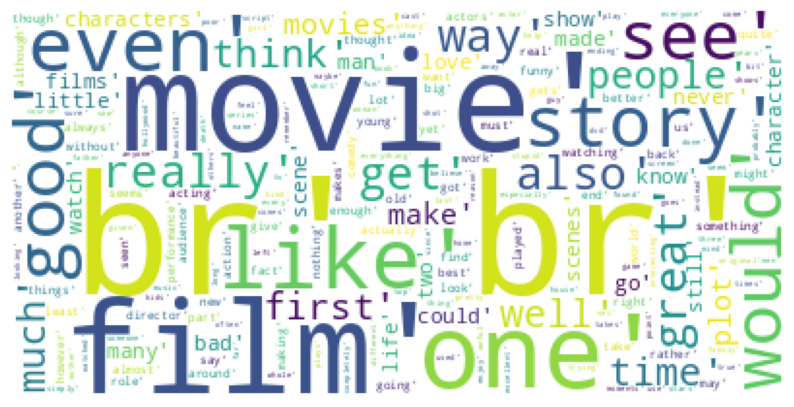

In [40]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting the number of times a word has repeated through out the data.

In [41]:
tokens_without_sw=(str(tokens_without_sw))

In [42]:
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
# Removing stopwords as creating two lists to display the words and their counts

In [43]:
counted_words.most_common(100) # the word 'movie' has repeated for 2081 times.

[("'br',", 8248),
 ("'movie',", 3576),
 ("'film',", 3118),
 ("'one',", 2014),
 ("'like',", 1608),
 ("'good',", 1080),
 ("'even',", 1054),
 ("'see',", 1050),
 ("'would',", 994),
 ("'story',", 924),
 ("'time',", 914),
 ("'really',", 910),
 ("'get',", 830),
 ("'well',", 824),
 ("'much',", 802),
 ("'people',", 728),
 ("'made',", 708),
 ("'first',", 706),
 ("'bad',", 704),
 ("'way',", 696),
 ("'also',", 694),
 ("'great',", 692),
 ("'movies',", 678),
 ("'think',", 628),
 ("'make',", 616),
 ("'plot',", 584),
 ("'watch',", 576),
 ("'many',", 570),
 ("'characters',", 556),
 ("'never',", 550),
 ("'two',", 546),
 ("'little',", 544),
 ("'life',", 542),
 ("'could',", 542),
 ("'character',", 536),
 ("'films',", 530),
 ("'best',", 528),
 ("'seen',", 510),
 ("'know',", 500),
 ("'acting',", 496),
 ("'man',", 482),
 ("'go',", 460),
 ("'show',", 460),
 ("'ever',", 460),
 ("'scene',", 458),
 ("'scenes',", 454),
 ("'love',", 440),
 ("'better',", 438),
 ("'back',", 434),
 ("'still',", 416),
 ("'end',", 414)

# Visualizing top 10 repeated/common words using bar graph.

<BarContainer object of 10 artists>

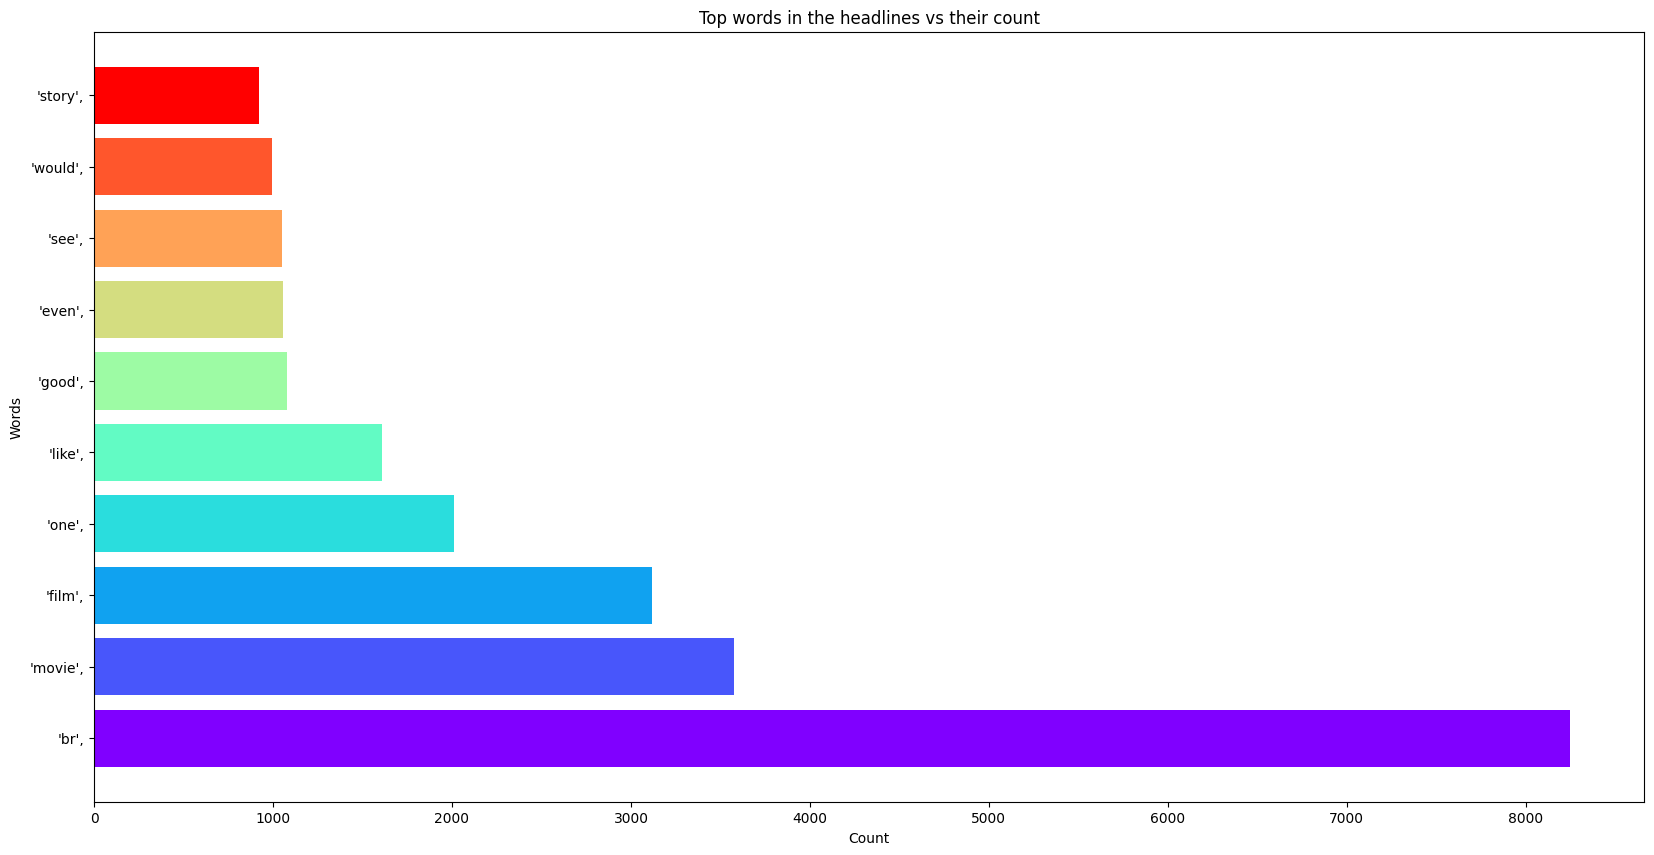

In [44]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Sentiment Analysis.

### Vader sentiment analysis is done in order to find if a given (Word) is positive, negative or  neutral in nature.
VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. In this approach, each of the words in the lexicon is rated as to whether it is positive or negative, and in many cases, how positive or negative. Below you can see an excerpt from VADER’s lexicon, where more positive words have higher positive ratings and more negative words have lower negative ratings.
Vader sentiment analysis for a given (word) if positive, negative or  neutral in nature.

In [45]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentence = tokens_without_sw
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)

print('Positive:',pos_word_list)
print('Neutral:',neu_word_list)
print('Negative:',neg_word_list)
# score = sid.polarity_scores(sentence)
# print('\nScores:', score)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
#pos_word_list[:100]
#neg_word_list[:100]

### Top 100 Positive words.

In [48]:
print(list(iter(pos_word_list[:100]))) # These are the top 100 positive words found in the dataset.

["'trust", "'security", "'agreements", "'pretty", "'charm", "'romance", "'ready", "'well", "'comfortable", "'wonderful", "'comforting", "'well", "'truly", "'well", "'worth", "'great", "'comedy", "'dream", "'solid", "'plays", "'well", "'wonderful", "'comedy", "'well", "'love", "'laughed", "'comedies", "'impressed", "'sexy", "'spirited", "'jewel", "'interesting", "'great", "'comedy", "'friends", "'thriller", "'like", "'thriller", "'well", "'playing", "'love", "'stunning", "'success", "'play", "'sophisticated", "'best", "'sincere", "'good", "'talented", "'alive", "'wish", "'good", "'luck", "'await", "'favorite", "'noble", "'truly", "'sympathetic", "'delight", "'like", "'fun", "'sure", "'like", "'excitement", "'hero", "'adventure", "'thank", "'like", "'nice", "'amazing", "'fresh", "'innovative", "'brilliant", "'funny", "'truly", "'entertaining", "'hand", "'original", "'brilliance", "'fit", "'respect", "'original", "'huge", "'success", "'encouraged", "'positive", "'truly", "'played", "'happ

### Top 100 Negative words.

In [49]:
print(list(iter(neg_word_list[:100]))) # These are the top 100 negative words found in the dataset.

["'struck", "'brutality", "'violence", "'timid", "'violence", "'prison", "'death", "'dodgy", "'forget", "'forget", "'forget", "'mess", "'struck", "'nasty", "'violence", "'violence", "'injustice", "'kill", "'prison", "'bitches", "'lack", "'prison", "'uncomfortable", "'discomforting", "'disappears", "'terribly", "'suspected", "'killer", "'disappointed", "'risk", "'devil", "'fighting", "'kill", "'arguing", "'ruins", "'meaningless", "'ignore", "'loneliness", "'anxiously", "'boring", "'tears", "'doubt", "'waste", "'fallen", "'painfully", "'bad", "'bad", "'hard", "'awful", "'bad", "'mistake", "'worst", "'awful", "'lame", "'nasty", "'boring", "'obsessives", "'hell", "'odd", "'low", "'problem", "'lost", "'helplessly", "'horror", "'horror", "'tired", "'died", "'scary", "'worn", "'cry", "'killing", "'warned", "'cry", "'complained", "'evil", "'mad", "'cry", "'disappointed", "'suck", "'fighting", "'cry", "'annoying", "'shoot", "'lost", "'ruin", "'cut", "'prisoners", "'bad", "'sorrow", "'bizarre", 

## Vader sentiment analysis for a given (Sentence) if positive, negative or  neutral in nature.

In [50]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)

     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked. They are right as this is exactly what happened with me.The first thing that struck me about Oz was its utality and unflinching scenes of violence which set in right from the word GO. Trust me this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs sex or violence. Its is hardcore in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. Em City is home to many..Aryans Muslims gangstas Latinos Christians Italians Irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare. Forget p

### Converting all Polarity scores and sentences into a dataframe.

In [51]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [52]:
df.head()

,Text,neg,neu,pos,compound
1,One of the other reviewers has mentioned that ...,0.176,0.758,0.066,-0.9907
2,A wonderful little production. The filming tec...,0.053,0.765,0.182,0.9670
3,I thought this was a wonderful way to spend ti...,0.116,0.675,0.210,0.9579
4,Basically theres a family where a little boy (...,0.130,0.808,0.062,-0.9213
5,Petter Matteis Love in the Time of Money is a ...,0.052,0.800,0.148,0.9744


## Arranging the dataset in descending order based on (Compound score) to find the most important sentence from the given data.

In [53]:
imp_sent=df.sort_values(by='compound', ascending=False)
## arranging the compound column in descending order to find the best sentence.

In [54]:
imp_sent

,Text,neg,neu,pos,compound
411,I firmly believe that the best Oscar ceremony ...,0.087,0.621,0.292,0.9996
567,Few would argue that master animation director...,0.042,0.743,0.215,0.9995
211,I have just given a for Thieves Highway I men...,0.094,0.637,0.269,0.9992
364,The plot: Michael Linnett Connors has done eve...,0.018,0.816,0.166,0.9992
944,A film for mature educated audiences...I saw R...,0.073,0.678,0.249,0.9990
...,...,...,...,...,...
354,This film held my interest enough to watch it ...,0.193,0.702,0.105,-0.9981
247,This show makes absolutely no sense. Every wee...,0.332,0.617,0.052,-0.9982
323,If only I had read the review by Alex Sander (...,0.197,0.713,0.089,-0.9983
766,This film cant make up its mind whether its me...,0.255,0.649,0.096,-0.9988


In [ ]:
print(df['Text'].iloc[410] ) # sentence with index 410 has the highest compound score
                             # and hence it is the most important sentence among all the sentences.

I firmly believe that the best Oscar ceremony in recent years was in  for two reasons:  ) Host Steve Martin was at his most wittiest:  I saw the teamsters help Michael Moore into the trunk of his limo  and  Ill better not mention the gay mafia in case I wake up with a poodles head in my bed   ) Surprise winners: No one had Adrien Brody down for best actor ( Genuine applause ) or Roman Polanski for best director ( Genuine jeers and boos ) but they won Last years award ceremony wasnt too bad but there was little in the way of surprises and I was happy to see RETURN OF THE KING sweep the awards even if it wasnt the best in the trilogy ( FELLOWSHIP was much better )but what let the BBC coverage down was Jonathan Ross getting a few of his sycophantic mates round and pretending they were hilarious when they were anything but . So when I heard Sky were doing the coverage for British TV I was expecting Barry Norman and Mark Kermode to be doing the links  but instead we ended up with Jamie Thea

## Finding top positive sentence in the data.

In [55]:
pos_sent=df.sort_values(by='pos', ascending=False)
## Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [56]:
pos_sent

,Text,neg,neu,pos,compound
161,MYSTERY MEN has got to be THE stupidest film I...,0.099,0.446,0.455,0.9896
10,If you like original gut wrenching laughter yo...,0.098,0.511,0.391,0.9149
322,I have watched this movie countless times and ...,0.000,0.662,0.338,0.9836
382,This film was pretty good. I am not too big a ...,0.035,0.627,0.338,0.9944
598,In short if you want to watch Burt Reynolds be...,0.040,0.626,0.334,0.9970
...,...,...,...,...,...
414,A rating of does not begin to express how dul...,0.386,0.614,0.000,-0.8316
943,If somebody wants to make a really REALLY bad ...,0.159,0.841,0.000,-0.9565
997,I hated it. I hate selfaware pretentious inani...,0.234,0.766,0.000,-0.9618
756,A wellmade runofthemill movie with a tragic en...,0.128,0.872,0.000,-0.8402


In [57]:
print(df['Text'].iloc[160] ) # sentence with index 160 has the highest positive score and is the most postive.

MYSTERY MEN has got to be THE stupidest film Ive ever seen but what a film! I thought it was fabulous excellent and impressive. It was funny welldone and nice to see ridiculous Super Heroes for a change! And being able to pull it off! This was great! Ill definitely watch it again!


## Finding top negative sentence in the data.

In [58]:
neg_sent=df.sort_values(by='neg', ascending=False)
## Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [59]:
neg_sent

,Text,neg,neu,pos,compound
414,A rating of does not begin to express how dul...,0.386,0.614,0.000,-0.8316
737,Baba Rajinikanth will never forget this name ...,0.343,0.629,0.027,-0.9954
247,This show makes absolutely no sense. Every wee...,0.332,0.617,0.052,-0.9982
282,After a very scary crude opening which gives y...,0.325,0.614,0.061,-0.9894
98,Well I like to watch bad horror BMovies cause ...,0.318,0.561,0.121,-0.9907
...,...,...,...,...,...
958,Have to agree that this movie and its talented...,0.000,0.763,0.237,0.9850
608,This film is quite simply illiant. The cinemat...,0.000,0.918,0.082,0.7812
962,I agree with BigAlC this movie actually prepa...,0.000,0.790,0.210,0.9850
632,Lackawanna Blues is and excellent movie. The c...,0.000,0.775,0.225,0.9930


In [60]:
print(df['Text'].iloc[413] )# sentence with index 413 has the highest negative score and is the most negative sentence

A rating of  does not begin to express how dull depressing and relentlessly bad this movie is.


In [61]:
sentences=df

## Giving threshold values to classify if a given sentence is positive, negative or neutral in nature.

In [62]:
#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['compound'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['compound'] > 0) & (sentences.iloc[i]['compound'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['compound'] <= 0)):
        predicted_value.append('negative')
        i = i+1
## The threshold value will categorize if a given sentence is positive negative or neutral in nature.

In [63]:
predicted_value

['negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'negat

### Adding the target or sentiment column to our data frame.

In [64]:
df['Target'] = predicted_value
## A new column has been created called as 'Target' with sentiments assigned to a given text.

In [65]:
df.head()

,Text,neg,neu,pos,compound,Target
1,One of the other reviewers has mentioned that ...,0.176,0.758,0.066,-0.9907,negative
2,A wonderful little production. The filming tec...,0.053,0.765,0.182,0.9670,positive
3,I thought this was a wonderful way to spend ti...,0.116,0.675,0.210,0.9579,positive
4,Basically theres a family where a little boy (...,0.130,0.808,0.062,-0.9213,negative
5,Petter Matteis Love in the Time of Money is a ...,0.052,0.800,0.148,0.9744,positive


### Removing/dropping the 'neg', 'neu', 'pos', and 'compound' columns.

In [66]:
df.drop(['neg','neu','pos','compound'],axis=1,inplace=True)
## Dropping the neg, neu, pos, and compound columns.

In [67]:
df
## Final dataframe with sentiments.

,Text,Target
1,One of the other reviewers has mentioned that ...,negative
2,A wonderful little production. The filming tec...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically theres a family where a little boy (...,negative
5,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
996,Nothing is sacred. Just ask Ernie Fosselius. T...,neutral
997,I hated it. I hate selfaware pretentious inani...,negative
998,I usually try to be professional and construct...,negative
999,If you like me is going to see this in a film ...,negative


In [68]:
df['Target'].value_counts()
### There are 568 positive, 369 negative and 63 neutral columns present in the dataset.

positive    577
negative    363
neutral      60
Name: Target, dtype: int64

In [69]:
cat_cols=['Target']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes
### Label Encoding the target column.

Text      object
Target     int64
dtype: object

In [70]:
df['Target'].value_counts()
## Label encoded value_counts()

2    577
0    363
1     60
Name: Target, dtype: int64

In [71]:
df

,Text,Target
1,One of the other reviewers has mentioned that ...,0
2,A wonderful little production. The filming tec...,2
3,I thought this was a wonderful way to spend ti...,2
4,Basically theres a family where a little boy (...,0
5,Petter Matteis Love in the Time of Money is a ...,2
...,...,...
996,Nothing is sacred. Just ask Ernie Fosselius. T...,1
997,I hated it. I hate selfaware pretentious inani...,0
998,I usually try to be professional and construct...,0
999,If you like me is going to see this in a film ...,0


In [72]:
# Vectorizing training data.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Text'])
Y = df['Target']
## Applying Tf-Idf vectorizer on the Text column.

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
### Splitting the dataset.

(800, 19098) (200, 19098) (800,) (200,)


### Logistic Regression

In [74]:
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on train is:  0.9225
Model accuracy on test is:  0.635


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

## Decision Tree Classifier

In [76]:
DT = DecisionTreeClassifier().fit(X,Y)

In [77]:
#predict on train
train_preds2 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
confusion_matrix train is:  [[283   0   0]
 [  0  47   0]
 [  0   0 470]]
confusion_matrix test is:  [[ 80   0   0]
 [  0  13   0]
 [  0   0 107]]
Wrong predictions out of total
--------------------------------------------------
0 / 200
--------------------------------------------------
KappaScore is:  1.0


In [78]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train
train_preds3 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.6
--------------------------------------------------
confusion_matrix train is:  [[283   0   0]
 [  0  47   0]
 [  0   0 470]]
confusion_matrix test is:  [[ 15   0  65]
 [  1   0  12]
 [  2   0 105]]
Wrong predictions out of total
--------------------------------------------------
80 / 200
--------------------------------------------------


# Support Vector Machine

In [79]:
#fit the model on train data
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train
train_preds5 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))
print('-'*50)

Model accuracy on train is:  0.95625
Model accuracy on test is:  0.695
--------------------------------------------------
confusion_matrix train is:  [[277   0   6]
 [  5  18  24]
 [  0   0 470]]
confusion_matrix test is:  [[ 37   0  43]
 [  2   0  11]
 [  5   0 102]]
Wrong predictions out of total
--------------------------------------------------
61 / 200
--------------------------------------------------


In [80]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train
train_preds4 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)

Model accuracy on train is:  0.72375
Model accuracy on test is:  0.53
--------------------------------------------------
confusion_matrix train is:  [[122   0 161]
 [ 17   0  30]
 [ 13   0 457]]
confusion_matrix test is:  [[ 9  0 71]
 [ 2  0 11]
 [10  0 97]]
Wrong predictions out of total
--------------------------------------------------
94 / 200
--------------------------------------------------
